deque(['a', 'c', 'f', 'e', 'b'])
['a', 'c', 'f', 'e', 'b']
deque(['a', 'd'])
['a', 'd']


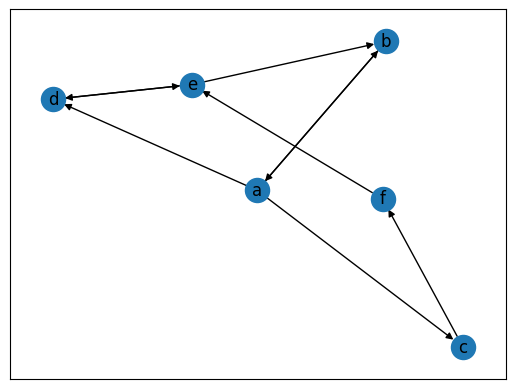

: 

In [22]:
import matplotlib.pyplot as plt 
import networkx as nx 
from collections import deque

G = nx.DiGraph()

G.add_node("a")
G.add_node("b")
G.add_node("c")
G.add_node("d")
G.add_node("e")
G.add_node("f")

G.add_edge("a", "b",weight=10)
G.add_edge("a", "c",weight=2)
G.add_edge("a", "d",weight=3)
G.add_edge("b","a",weight=1)
G.add_edge("c","f",weight=2)
G.add_edge("d","e",weight=5)
G.add_edge("e","b",weight=3)
G.add_edge("e","d",weight=2)
G.add_edge("f","e",weight=1)

nx.draw_networkx(G)

def weight(G, u, v):
    return G.edges[u,v]['weight']

def dijkstra(G,s,g):
    n = G.nodes()
    d = {}
    Q = []
    for v in n:
        if s==v:
            d[v] = 0
        else:
            d[v] = float('inf')
        Q.append(v)
    for v in n:
        prev = {}
        prev[v] = None
    d[s] = 0
    while len(Q) > 0:
        u = min(Q, key=lambda v: d[v])  
        Q.remove(u)
        if u == g:
            break
        for v in G.adj[u]:
            
            if  d[v] > d[u] + weight(G,u,v) :
                d[v] = d[u] + weight(G,u,v)
                prev[v] = u
    shortest_path = deque([g])
    while g!=s:
        g = prev[g]
        shortest_path.appendleft(g)
    return shortest_path

print(dijkstra(G,"a","b"))
print(nx.shortest_path(G,"a","b",weight="weight"))
print(dijkstra(G,"a","d"))
print(nx.shortest_path(G,"a","d",weight="weight"))

